In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("..//input//train.csv")
test_data =  pd.read_csv("..//input//test.csv")

In [4]:
train_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


## The attributes have the following meaning:

- Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- Pclass: passenger class.
- Name, Sex, Age: self-explanatory
- SibSp: how many siblings & spouses of the passenger aboard the Titanic.
- Parch: how many children & parents of the passenger aboard the Titanic.
- Ticket: ticket id
- Fare: price paid (in pounds)
- Cabin: passenger's cabin number
- Embarked: where the passenger embarked the Titanic

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> As we see **Embarked** and **Age** are less than **891**
>> and **Cabin** has only 204 non-null!!

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> only (**38%**) Survived (mean of survived)

In [7]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [8]:
train_data["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [9]:
train_data[["Pclass","Embarked"]].groupby("Pclass").value_counts().unstack()

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [10]:
train_data[["Sex","Survived"]].groupby("Sex").value_counts().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [11]:
train_data_num = train_data.select_dtypes(include = [np.number])
train_data_cat = train_data.select_dtypes(include = object)

In [12]:
train_data_num_corr = train_data_num.corr()
train_data_num_corr["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

> Feature Engineering
- family size : number of childern or parents + siblings or spouses + 1  
- isAlone :  when family size = 1 


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
# custom transformer
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):

    def __init__(self, newAttributeNames):
        self.newAttributeNames = newAttributeNames
    
    def fit(self, data, traget = None):
        return self
    
    def transform(self, data, traget = None):
        data = data.copy()
        data = pd.DataFrame(data, columns=["Age", "SibSp", "Parch", "Fare", "Pclass"])
        data[self.newAttributeNames[0]] = data["Parch"] + data["SibSp"] + 1 
        data[self.newAttributeNames[1]] = (data[self.newAttributeNames[0]] == 1).astype(int)
        return data

In [14]:
"""
Each subpipeline starts with a selector transformer: it simply transforms the data by selecting the desired attributes (numerical or categorical),
dropping the rest, and converting the resulting DataFrame to a NumPy array. There is nothing in Scikit-Learn to handle Pandas DataFrames,
so we need to write a simple custom transformer
"""
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names =  attribute_names
    
    def fit(self, data, traget = None):
        return self
    
    def transform(self, data, target = None):
        return data[self.attribute_names].values

#### Data Preprocessing

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(attribute_names = ["Age", "SibSp", "Parch", "Fare","Pclass"])),
    ("Imputer", SimpleImputer(strategy = "most_frequent")),
    ("attr_add", CombinedAttributeAdder(newAttributeNames = ["FamilySize", "IsAlone"])),
    ("std_scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(attribute_names = ["Pclass", "Sex", "Embarked"])),
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse_output=False)),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
])

prepared_train_data = preprocess_pipeline.fit_transform(train_data)

In [17]:
prepared_train_data

array([[-0.49779327,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71504807,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.19458293, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.3461881 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.19458293, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.26023257, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [16]:
prepared_train_data.shape

(891, 15)

In [18]:
traget = train_data["Survived"]
traget

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators = 100 ,random_state = 42)
forest_scores = cross_val_score(forest_clf, prepared_train_data, traget, cv = 10)
forest_scores.mean()

np.float64(0.8092883895131087)

In [22]:
from sklearn.svm import SVC

svm_clf = SVC(gamma = "auto")
svm_scores = cross_val_score(svm_clf, prepared_train_data, traget, cv=10)
svm_scores.mean()

np.float64(0.8249313358302122)

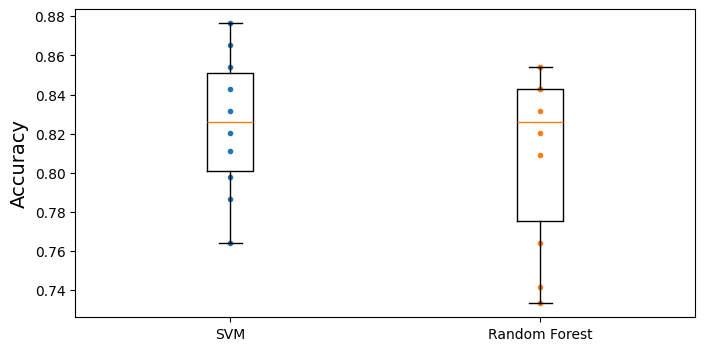

In [27]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], tick_labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()